# PML Penalized/Regularized Linear Models Lecture Code

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
plt.style.use('ggplot')
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True

## RSS of a Penalized Linear Model 
- We consider a synthesized data set which is described by a linear equation $z = 2x+3y+\epsilon$

In [2]:
epsilon = 0.1*np.random.randn(100)
x = np.random.randn(100)
y = x + 0.2*np.random.randn(100)
z = -2*x - 3*y+epsilon
def RSS(beta0, beta1, beta2):
      return np.sum((z-beta0-beta1*x-beta2*y)**2, axis=0)     
RSS = np.vectorize(RSS)    

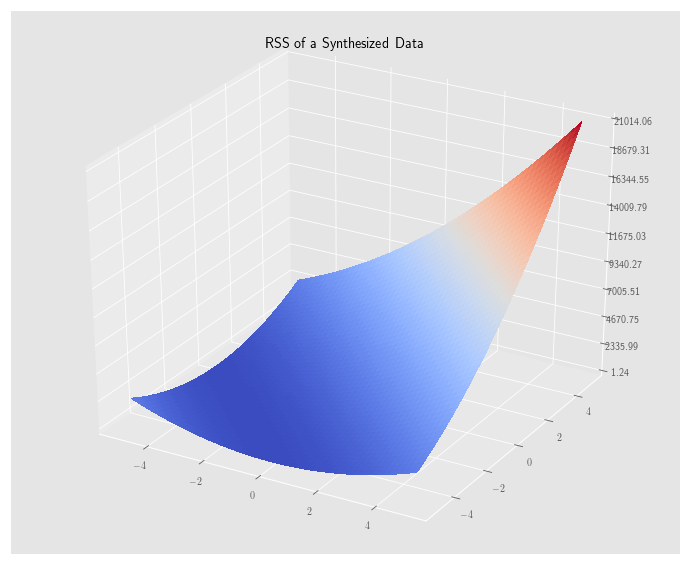

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
plt.rcParams['figure.figsize'] = (12,10)
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.linspace(-5,5,100)
Y = np.linspace(-5,5,100)
X, Y = np.meshgrid(X, Y)
Z = RSS(np.zeros_like(X), X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.title('RSS of a Synthesized Data')
plt.show()

## Ridge Penalization Term

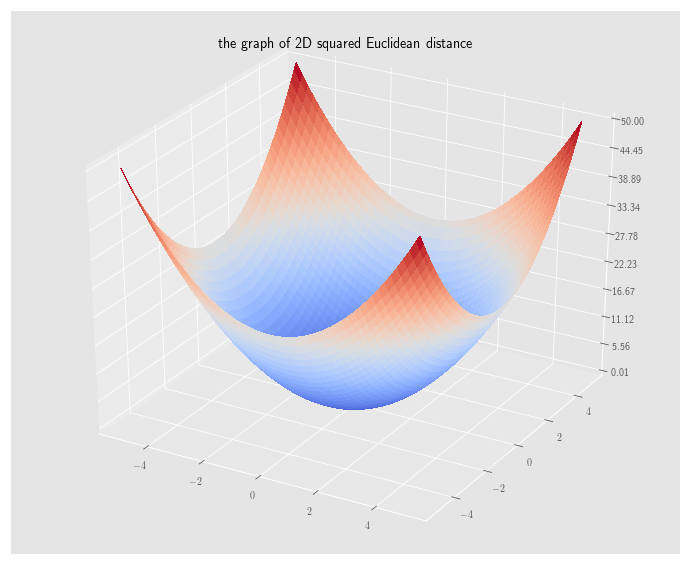

In [4]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
Z = (X**2 + Y**2)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.title('the graph of 2D squared Euclidean distance')
plt.show()

- In the following, we tune the eta parameter (called $\lambda$ in the lecture) from 1, 10, to 1000
- Please observe the shape change of the **penalized RSS** graph

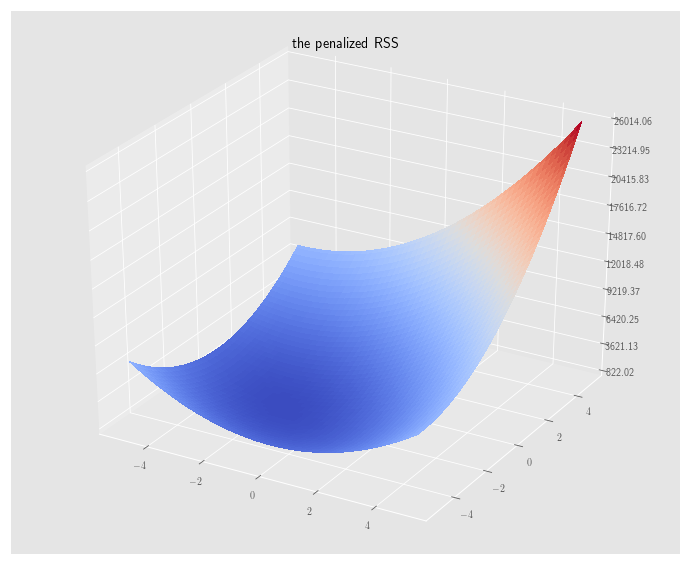

In [5]:
eta = 100  # 1, 100, 1000
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
Z = RSS(np.zeros_like(X), X, Y) + eta *(X**2 + Y**2)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

plt.title('the penalized RSS')
plt.show()

## Changes of Contour Plots of the Penalized RSS Function
- The same analysis can be carried out for the contour changes of **penalized RSS**

Text(0,0.5,'$\\beta_1$')

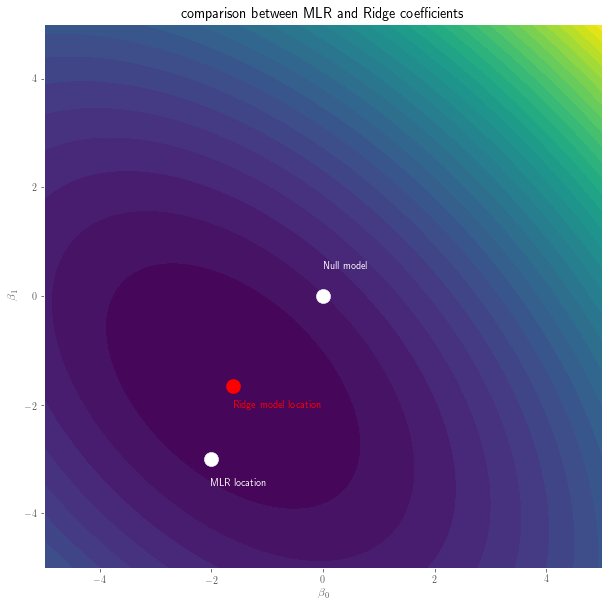

In [6]:
eta = 100
plt.rcParams['figure.figsize'] = (10,10)
Z = RSS(np.zeros_like(X), X, Y) + eta * (X**2 + Y**2)
fig, ax = plt.subplots()
CS = ax.contourf(X, Y, Z, 40)
plt.scatter([-2],[-3],s=200,c='w')
plt.text(-2,-3.5, 'MLR location', color='w')

A = np.matrix(np.concatenate((x.reshape(-1,1), y.reshape(-1,1)),axis=1))
# Penalized Normal Equation
beta = (A.T * A + eta*np.eye(2)).I * A.T * np.matrix(z.reshape(-1,1)) 
plt.scatter([beta[0]],[beta[1]], s=200, c='r')
plt.text(beta[0],beta[1]-0.4, 'Ridge model location', color='r')
plt.title('comparison between MLR and Ridge coefficients')
plt.scatter([0],[0], s=200, c='w')
plt.text(0,0.5,'Null model', color='w')
plt.xlabel(r'$\beta_0$')
plt.ylabel(r'$\beta_1$')

Text(0,0.5,'$\\beta_1$')

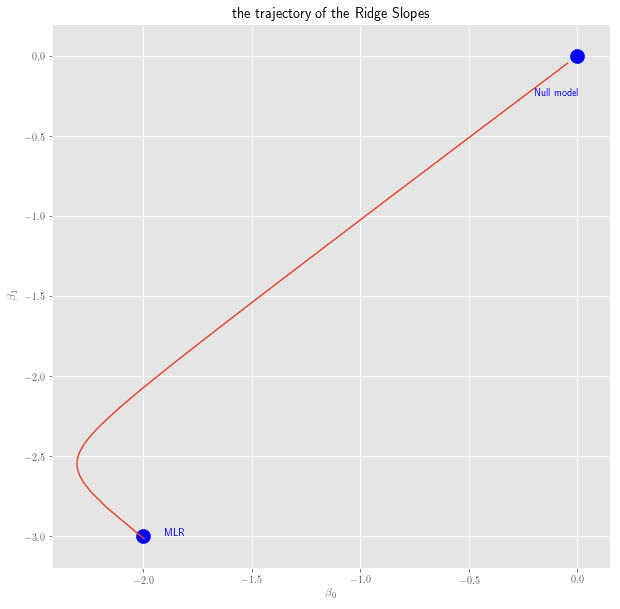

In [7]:
A = np.matrix(np.concatenate((x.reshape(-1,1), y.reshape(-1,1)),axis=1))

BETA = []
for eta in np.linspace(0, 10000, 10000):
        # Penalized Normal Equation
        beta = (A.T * A + eta*np.eye(2)).I * A.T * np.matrix(z.reshape(-1,1))
        BETA.append(beta)
BETA = np.squeeze(np.array(BETA))
plt.plot(BETA[:,0], BETA[:,1])
plt.scatter([-2,0],[-3,0],s=200,c='b')
plt.text(-1.9,-3,'MLR',color='b')
plt.text(-0.2,-0.25,'Null model', color='b')
plt.title('the trajectory of the Ridge Slopes')
plt.xlabel(r'$\beta_0$')
plt.ylabel(r'$\beta_1$')

- Notice that the Ridge penalty makes the slope of the $x$ variable decreases before it begins to increase monotonically

In [8]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import datasets

In [9]:
boston = datasets.load_boston()

In [10]:
house_features = pd.DataFrame(boston.data, columns=boston.feature_names)
prices         = pd.Series(boston.target)

In [11]:
house_features.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [12]:
house_features.drop('RAD', axis=1, inplace = True)

In [13]:
ridge = Ridge()

In [14]:
ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [15]:
ridge.fit(house_features, prices)
print('the ridge intercept is: %.2f' %(ridge.intercept_))
pd.Series(ridge.coef_, index=house_features.columns)

the ridge intercept is: 25.92


CRIM      -0.065825
ZN         0.040914
INDUS     -0.079983
CHAS       2.955953
NOX       -9.335946
RM         4.130459
AGE       -0.008908
DIS       -1.400492
TAX        0.000207
PTRATIO   -0.778525
B          0.008819
LSTAT     -0.525171
dtype: float64

##  Normalizing the Data Columns
- **sklearn** **ridge**, **lasso**, **elasticnet** offer normalization to the input features, which are turned off by default.
- **Normalization** and **standardization** are slightly different.
- Both of them **demean** the data columns.
- But **normalization** transforms the data columns, dividing by its **L2** norm
- **standardization** transforms the data columns, dividing by the standard deviation of the feature column.
- The **std** and **L2** norm differ by the scale $\sqrt(N)$, where $N$ is the sample size.
- If we intend to use **standardization**, please transform the data 
using **sklearn.preprocessing.StandardScalar** and turn off **normalize** before fitting a penalized model.

In [16]:
ridge.set_params(alpha = 0, normalize=True)

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001)

In [17]:
ridge.fit(house_features, prices)

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001)

In [18]:
print('the ridge intercept is: %.2f' %(ridge.intercept_))
pd.Series(ridge.coef_, index=house_features.columns)

the ridge intercept is: 29.78


CRIM       -0.067071
ZN          0.039710
INDUS      -0.058164
CHAS        3.115158
NOX       -15.282126
RM          4.111170
AGE        -0.003886
DIS        -1.490281
TAX         0.001327
PTRATIO    -0.839273
B           0.008466
LSTAT      -0.516861
dtype: float64

In [19]:
linear = LinearRegression()
linear

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
linear.set_params(normalize=True)
linear.fit(house_features, prices)
print('the MLR intercept is: %.2f' %(linear.intercept_))
pd.Series(linear.coef_, index=house_features.columns)

the MLR intercept is: 29.78


CRIM       -0.067071
ZN          0.039710
INDUS      -0.058164
CHAS        3.115158
NOX       -15.282126
RM          4.111170
AGE        -0.003886
DIS        -1.490281
TAX         0.001327
PTRATIO    -0.839273
B           0.008466
LSTAT      -0.516861
dtype: float64

- We observe that these coefficients are identical

## The Coefficient Plot of Ridge Against Regularization/Penalization Strength $\alpha$

In [21]:
alphas = np.arange(0,20)
ridge.set_params(normalize=True)
coefs  = []
scores = []
for alpha in alphas:
        ridge.set_params(alpha=alpha)
        ridge.fit(house_features, prices)  
        coefs.append(ridge.coef_)
        scores.append(ridge.score(house_features, prices))
coefs = pd.DataFrame(coefs, index = alphas, columns = house_features.columns)  
coefs.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,-0.067071,0.039710,-0.058164,3.115158,-15.282126,4.111170,-0.003886,-1.490281,0.001327,-0.839273,0.008466,-0.516861
1,-0.060034,0.017705,-0.072758,2.310874,-3.960146,2.873269,-0.009330,-0.248871,-0.002804,-0.537585,0.006251,-0.261727
2,-0.054058,0.015939,-0.070922,1.731555,-3.501168,2.102563,-0.010300,-0.085076,-0.002847,-0.415678,0.005069,-0.191569
3,-0.048272,0.014553,-0.065968,1.372680,-3.231025,1.670655,-0.010242,-0.022408,-0.002662,-0.341850,0.004331,-0.154280
4,-0.043398,0.013337,-0.060838,1.133992,-2.992585,1.392289,-0.009837,0.007417,-0.002454,-0.291589,0.003803,-0.130276


Text(0,0.5,'slope values')

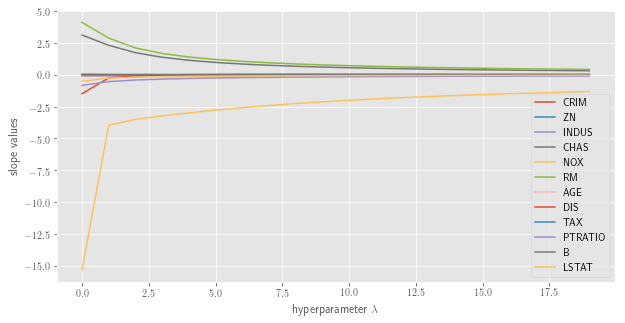

In [22]:
plt.rcParams['figure.figsize'] = (10,5)
for name in coefs.columns:
    plt.plot(coefs.index, coefs[name], label=name)
plt.legend(loc=4)   
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')

Text(0,0.5,'$R^2$')

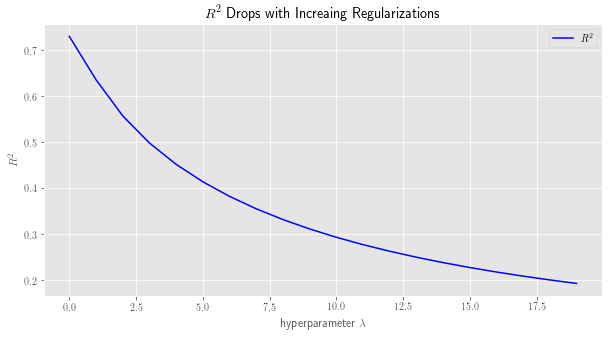

In [23]:
plt.plot(alphas, scores, c='b', label=r'$R^2$')
plt.legend(loc=1)
plt.title(r'$R^2$ Drops with Increaing Regularizations')
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [ ]:
# The Similar Analysis Can be Carried Out for Lasso As Well
- Because **normalize=False** still offers reasonable slope results, we choose not to turn on the **normalize** flag.

In [24]:
lasso  = Lasso()
alphas = np.linspace(0.1,20.1,20)
lasso.set_params(normalize=False)
coefs_lasso  = []

for alpha in alphas:
        lasso.set_params(alpha=alpha)
        lasso.fit(house_features, prices)  
        coefs_lasso.append(lasso.coef_)

coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = house_features.columns)  
coefs_lasso.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0.100000,-0.061308,0.042768,-0.098999,1.364977,-0.0,3.95580,-0.012141,-1.207349,-0.001896,-0.692439,0.009358,-0.559530
1.152632,-0.022058,0.043653,-0.025810,0.000000,-0.0,0.76129,0.023892,-0.604428,-0.003699,-0.642986,0.007083,-0.787314
2.205263,-0.000000,0.032260,-0.000000,0.000000,-0.0,0.00000,0.044462,-0.000000,-0.004447,-0.471708,0.006288,-0.828757
3.257895,-0.000000,0.038076,-0.000000,0.000000,0.0,0.00000,0.041543,-0.000000,-0.006249,-0.179234,0.006122,-0.804106
4.310526,-0.000000,0.040467,-0.000000,0.000000,0.0,0.00000,0.036752,-0.000000,-0.007471,-0.000000,0.006118,-0.773476


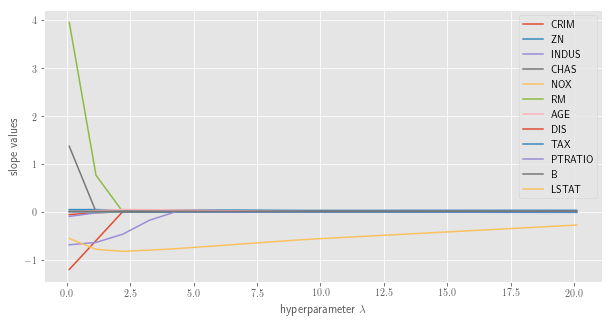

In [25]:
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=1)   

## ElasticNet 
**ElasticNet** is a hybrid penalized model 
- In sklearn the **ElasticNet** model has two major hyperparameters
    - **alpha**: the equivalence of **lambda** in the lecture. **alpha** controls the regularization strength
    - **l1_ratio**: the equivalence of **rho**. **l1_ratio** controls which mixture of **Ridge** and **Lasso** to use

In [26]:
from sklearn.linear_model import ElasticNet

In [27]:
ElasticNet?

In [28]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5, normalize=False)
elasticnet.fit(house_features, prices)
print(r'The R^2 is %.2f' %(elasticnet.score(house_features, prices)))
elasticnet.coef_,  elasticnet.intercept_

The R^2 is 0.72


(array([-6.18537943e-02,  4.47261286e-02, -1.11103639e-01,  1.22562599e+00,
        -0.00000000e+00,  3.48005208e+00, -9.02098225e-03, -1.23107357e+00,
        -1.64105279e-03, -7.16341229e-01,  9.01972764e-03, -5.91994487e-01]),
 24.982976893428553)

In [29]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5, normalize=True)
elasticnet.fit(house_features, prices)
print(r'The R^2 is %.2f' %(elasticnet.score(house_features, prices)))
elasticnet.coef_,  elasticnet.intercept_

The R^2 is 0.12


(array([-9.04950728e-03,  2.90948564e-03, -1.54684193e-02,  6.86599389e-02,
        -7.53989636e-01,  2.67180839e-01, -2.51349215e-03,  1.20464718e-02,
        -6.06013027e-04, -5.64305831e-02,  6.82236108e-04, -2.76032761e-02]),
 22.960314595548915)

In [30]:
N_alpha = 100
N_rho   = 10
alphaRange = np.logspace(-10, 2, N_alpha)
rhoRange   = np.linspace(0.1,1, N_rho) # we avoid very small rho by starting at 0.1
scores     = np.zeros((N_rho, N_alpha))
for alphaIdx, alpha in enumerate(alphaRange):
    for rhoIdx, rho in enumerate(rhoRange):
            elasticnet.set_params(alpha=alpha, l1_ratio=rho)
            elasticnet.fit(house_features, prices)
            scores[rhoIdx, alphaIdx] = elasticnet.score(house_features, prices)   

## Plotting the Coefficient of Determination in 3D
- We run a alpha-l1_ratio grid-search and record their $R^2$
- Then in the following we plot the surface of $R^2$-values in 3D

Text(0.5,0,'hyperparameter $\\rho$')

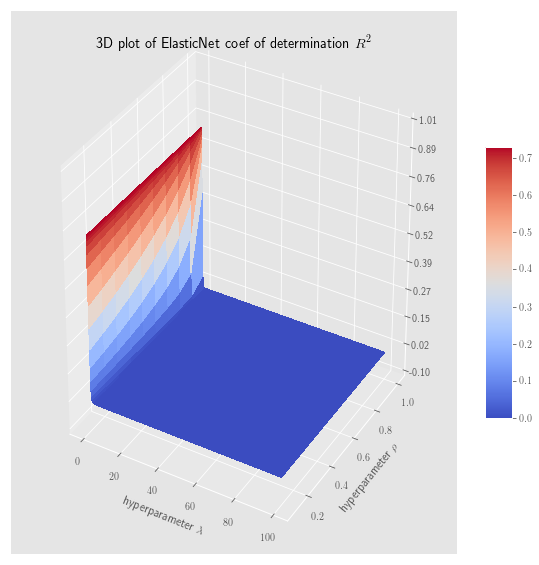

In [31]:
plt.rcParams['figure.figsize'] = (10,10)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = alphaRange
Y = rhoRange
X, Y = np.meshgrid(X, Y)
Z = scores

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.1, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.title(r'3D plot of ElasticNet coef of determination $R^2$')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'hyperparameter $\rho$')

## Comparing the Train-Test $R^2$
- For a fix data set, comparing **MSE** is more or less equivalent to comparing $R^2$

In [32]:
from sklearn.model_selection import train_test_split
np.random.seed(100)  # changing the random seed can produce different scenarios which lead to exceptions
X_train, X_test, Y_train, Y_test = train_test_split(house_features,prices,test_size=0.2)

In [33]:
ridge.set_params(normalize=True)
lasso.set_params(normalize=True)
ridge_scores_train = []
lasso_scores_train = []
ridge_scores_test  = []
lasso_scores_test  = []

alphas = np.linspace(0.01, 1, 100)

for alpha in alphas:
            ridge.set_params(alpha=alpha)
            lasso.set_params(alpha=alpha)
            ridge.fit(X_train, Y_train)
            lasso.fit(X_train, Y_train)
            ridge_scores_train.append(ridge.score(X_train, Y_train))
            ridge_scores_test.append(ridge.score(X_test, Y_test))
            lasso_scores_train.append(lasso.score(X_train, Y_train))
            lasso_scores_test.append(lasso.score(X_test, Y_test))
ridge_scores_train = np.array(ridge_scores_train) 
ridge_scores_test  = np.array(ridge_scores_test)
lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)

Text(0,0.5,'$R^2$')

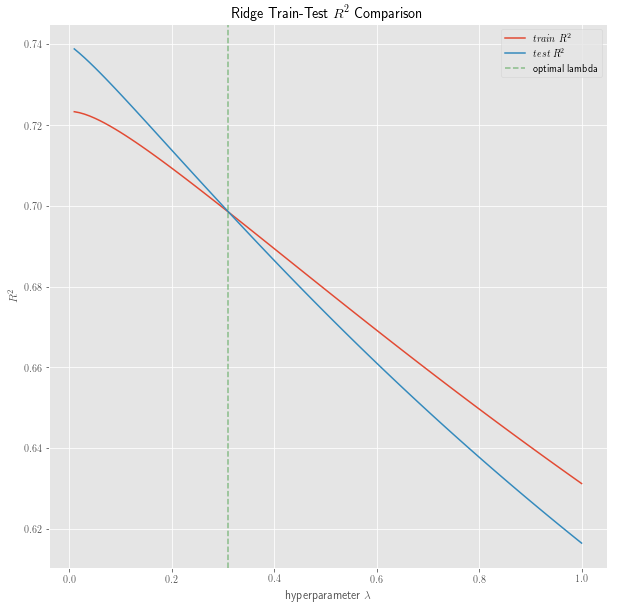

In [34]:
plt.plot(alphas, ridge_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, ridge_scores_test, label=r'$test\ R^2$')
plt.legend(loc=1)
plt.title(r'Ridge Train-Test $R^2$ Comparison')
ridge_underfit = ridge_scores_train < ridge_scores_test
last_underfit  = np.max(alphas[ridge_underfit])
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

Text(0,0.5,'$R^2$')

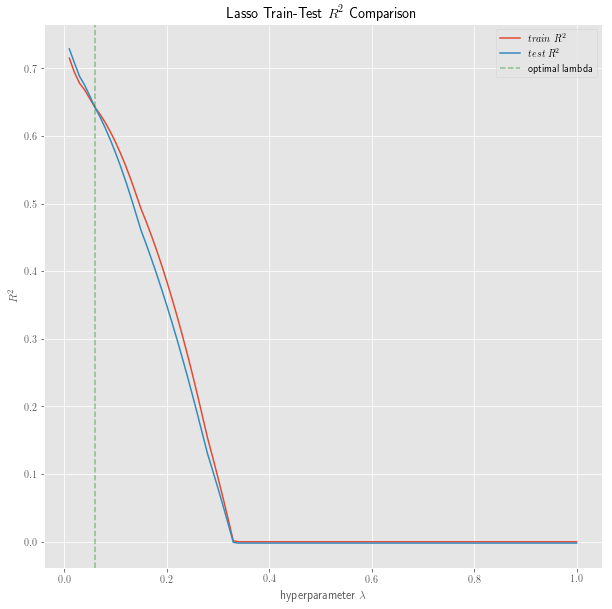

In [35]:
plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train-Test $R^2$ Comparison')
lasso_underfit = lasso_scores_train < lasso_scores_test
last_underfit  = np.max(alphas[lasso_underfit])
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')